# Describing Distributions (Core)
- Zach Hanson


## Libraries

In [15]:
#Standard
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#scipy
from scipy import stats

## Functions

In [24]:
#Function to create histogram of a feature with a KDE
def create_hist(df, col_name):
    feature = df[col_name]
    mean = feature.mean()
    median = feature.median()
    std = feature.std()
    plus_one_std = mean + std
    minus_one_std = mean - std
    fig, ax = plt.subplots(figsize=(10,5))
    sns.histplot(feature, ax = ax, stat = 'probability')
    ax.axvline(plus_one_std, color='black', label=f'+1 std = {plus_one_std:,.2f}')
    ax.axvline(minus_one_std, color='black', label=f'-1 std = {minus_one_std:,.2f}')
    ax.axvline(mean, color='red', label=f'Mean = {mean:,.2f}')
    ax.axvline(median, color='green', label=f'Median = {median:,.2f}')
    ax.axvspan(plus_one_std, minus_one_std, color='yellow', zorder=0)
    ax.set_title(f'{col_name}')
    ax.legend();
    
    ax2 = ax.twinx()
    sns.kdeplot(feature, ax=ax2)

- Code to create twin axis for kde plot was derived from: https://stackoverflow.com/questions/33323432/add-kde-on-to-a-histogram

## Loading Data


In [3]:
df = pd.read_csv('Data/medical_dataset.csv')
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


- Data loaded

## VitD_levels

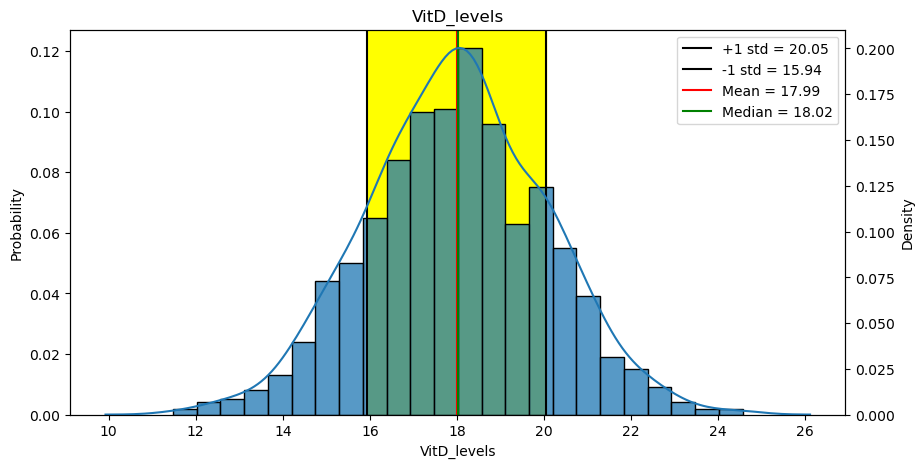

In [12]:
create_hist(df, 'VitD_levels')

In [17]:
#Finding type of kurtosis
kurt = stats.kurtosis(df['VitD_levels'], fisher = False)
kurt

3.013147515833447

- This feature is continuous
- There is no skew on this data, appears to be a very normal distribution
- Kurtosis for this feature is 3.013 using Pearson calculation
    - Using Pearson, kurtosis score of ~3.0 is Mesokurtic

## Doc_visits

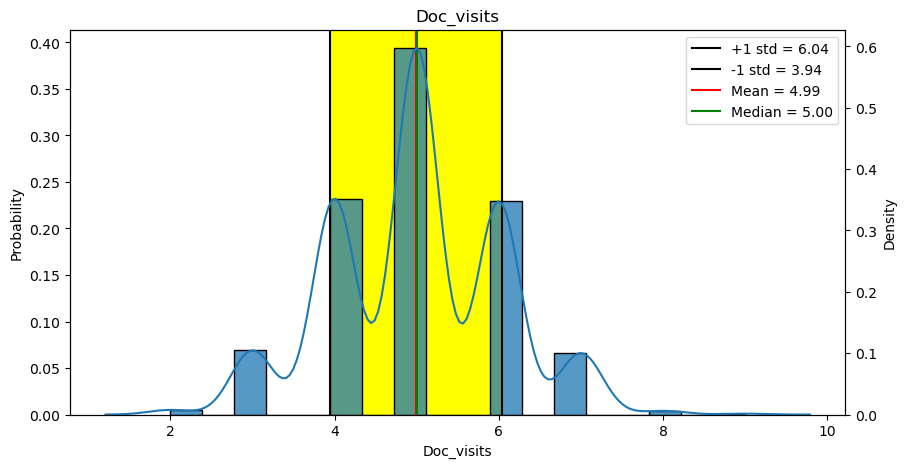

In [13]:
create_hist(df, 'Doc_visits')

In [23]:
#Finding type of kurtosis
kurt = stats.kurtosis(df['Doc_visits'], fisher = False)
kurt

2.9919958083381206

- This feature is discrete
- There is no skew on this data, appears to be a very normal distribution
- Kurtosis for this feature is 2.992 using Pearson calculation
    - Using Pearson, kurtosis score of ~3.0 is Mesokurtic

## TotalCharge

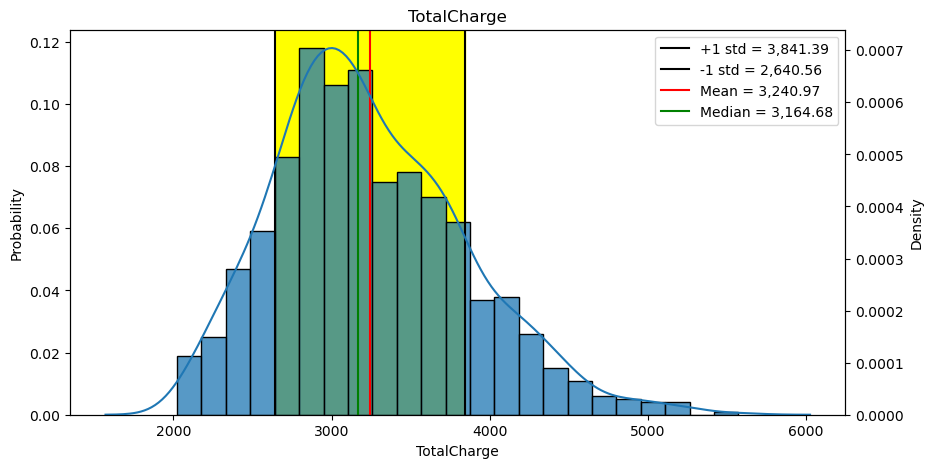

In [14]:
create_hist(df, 'TotalCharge')

In [21]:
#Finding type of kurtosis
kurt = stats.kurtosis(df['TotalCharge'], fisher = False)
kurt

3.2650077463439384

- This feature is continuous
- There appears to be a slight positive skew for this feature
- Kurtosis for this feature is 3.265 using Pearson calculation
    - Using Pearson, kurtosis score of > 3.0 is Leptokurtic